# PCA

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
genes = ['gene'+str(i) for i in range(1,101)]

In [4]:
wt = ['wt'+str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1,6)]


In [5]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [6]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10100), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10100), size=5)
    

In [7]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,8340,8392,8472,8241,8448,3123,3090,3057,3037,3000
gene2,7637,7685,7696,7710,7510,5254,5399,5303,5385,5393
gene3,4428,4435,4319,4391,4307,6456,6289,6221,6415,6152
gene4,4424,4432,4419,4308,4456,9826,9936,9858,9998,10097
gene5,1617,1596,1644,1557,1622,1641,1595,1643,1572,1623


In [10]:
data.shape

(100, 10)

In [11]:
scaled_data = preprocessing.scale(data.T)

In [83]:
pca = PCA()

In [84]:
pca.fit(scaled_data)

PCA()

In [85]:
pca_data = pca.transform(scaled_data)

In [89]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]

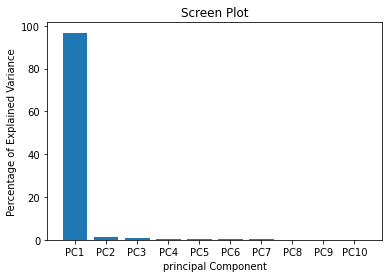

In [90]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("principal Component")
plt.title("Screen Plot")
plt.show()

In [92]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

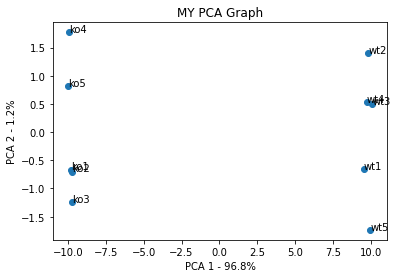

In [100]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("MY PCA Graph")
plt.xlabel(f"PCA 1 - {per_var[0]}%")
plt.ylabel(f"PCA 2 - {per_var[1]}%")

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

# With out Transposing data

In [15]:
scaled_data = preprocessing.scale(data)

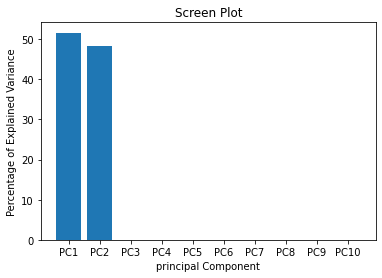

In [16]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("principal Component")
plt.title("Screen Plot")
plt.show()